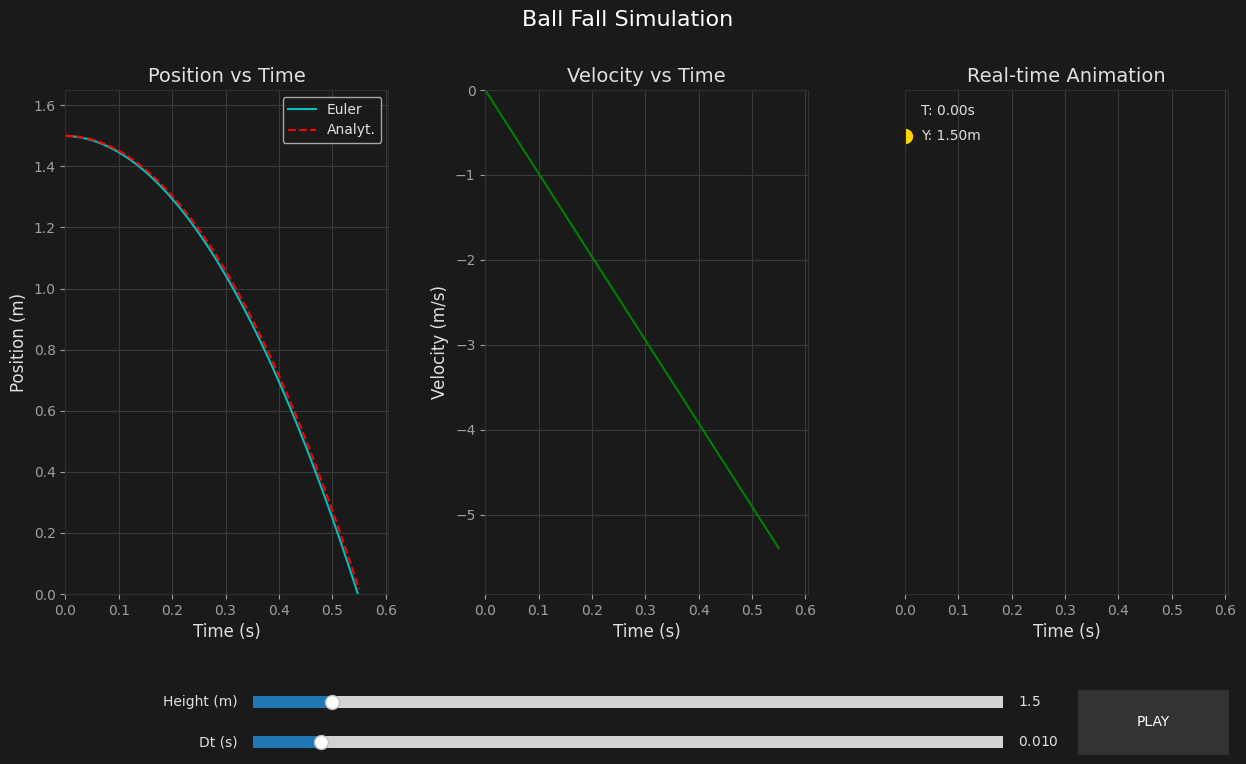

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider, Button
import os

# --- 1. Visual Styling (Dark Mode) ---
plt.rcParams.update({
    'figure.facecolor': (0.102, 0.102, 0.102),
    'axes.facecolor': (0.102, 0.102, 0.102),
    'axes.labelcolor': (0.878, 0.878, 0.878),
    'text.color': (0.878, 0.878, 0.878),
    'xtick.color': (0.627, 0.627, 0.627),
    'ytick.color': (0.627, 0.627, 0.627),
    'axes.edgecolor': (0.188, 0.188, 0.188),
    'grid.color': (0.227, 0.227, 0.227),
    'figure.titlesize': 16,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.figsize': (15, 8),
    'figure.dpi': 100
})

if not os.path.exists('Graphiques'):
    os.makedirs('Graphiques')

# --- 2. Physics Constants ---
g = 9.81
r = 0.03
vy0 = 0.0

# --- 3. Simulation Logic ---
def calculate_trajectory(y0, dt):
    y = y0
    vy = vy0
    t = 0.0
    
    y_values = [y0]
    vy_values = [vy0]
    time_values = [t]

    while y > r:
        vy = vy - g * dt
        y = y + vy * dt
        t += dt
        y_values.append(y)
        vy_values.append(vy)
        time_values.append(t)
        
    return np.array(time_values), np.array(y_values), np.array(vy_values)

# --- 4. Figure Setup ---
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
# Leave space at the bottom for the sliders/button
plt.subplots_adjust(bottom=0.25, wspace=0.3) 

fig.suptitle("Ball Fall Simulation", color='white')

# Initial data placeholders
line1_euler, = ax1.plot([], [], 'c-', label='Euler')
line1_analyt, = ax1.plot([], [], 'r--', label='Analyt.')
line2, = ax2.plot([], [], 'g-', label='Velocity')
line3, = ax3.plot([], [], 'o', color='gold', markersize=10) # The animated ball

# Text placeholders
txt_time = ax3.text(0.05, 0.95, '', transform=ax3.transAxes)
txt_pos = ax3.text(0.05, 0.90, '', transform=ax3.transAxes)

# Formatting axes
for ax in [ax1, ax2, ax3]:
    ax.grid(True)

ax1.set_title('Position vs Time')
ax1.set_ylabel('Position (m)')
ax1.set_xlabel('Time (s)')

ax2.set_title('Velocity vs Time')
ax2.set_ylabel('Velocity (m/s)')
ax2.set_xlabel('Time (s)')

ax3.set_title('Real-time Animation')
ax3.set_xlabel('Time (s)')
# Hide Y axis numbers on animation graph for cleaner look (optional)
ax3.get_yaxis().set_visible(False) 

# --- 5. UI Controls (Sliders & Button) ---
# Define positions [left, bottom, width, height]
ax_height = plt.axes([0.25, 0.1, 0.5, 0.03])
ax_dt = plt.axes([0.25, 0.05, 0.5, 0.03])
ax_button = plt.axes([0.8, 0.05, 0.1, 0.08])

# Create Widgets
s_height = Slider(ax_height, 'Height (m)', 0.5, 10.0, valinit=1.5, valstep=0.1)
s_dt = Slider(ax_dt, 'Dt (s)', 0.001, 0.1, valinit=0.01, valstep=0.001)
b_play = Button(ax_button, 'PLAY', color='0.2', hovercolor='0.3')
b_play.label.set_color('white')

# Global variable for animation
anim = None

# --- 6. Update Logic ---
def run_simulation(event):
    global anim
    
    # 1. Get slider values
    h_val = s_height.val
    dt_val = s_dt.val
    
    # 2. Calculate Physics
    t_vals, y_vals, vy_vals = calculate_trajectory(h_val, dt_val)
    
    # Analytical solution for comparison
    t_analyt = np.linspace(0, t_vals[-1], 100)
    y_analyt = h_val - 0.5 * g * t_analyt**2
    
    # 3. Update Static Plots
    line1_euler.set_data(t_vals, y_vals)
    line1_analyt.set_data(t_analyt, y_analyt)
    line2.set_data(t_vals, vy_vals)
    
    # Rescale Axes
    ax1.set_xlim(0, t_vals[-1]*1.1)
    ax1.set_ylim(0, h_val*1.1)
    
    ax2.set_xlim(0, t_vals[-1]*1.1)
    ax2.set_ylim(min(vy_vals)*1.1, 0)
    
    ax3.set_xlim(0, t_vals[-1]*1.1)
    ax3.set_ylim(0, h_val*1.1)
    
    ax1.legend()
    
    # 4. Define Animation Frame Update
    def animate(frame):
        if frame < len(t_vals):
            cur_t = t_vals[frame]
            cur_y = y_vals[frame]
            
            line3.set_data([cur_t], [cur_y])
            txt_time.set_text(f'T: {cur_t:.2f}s')
            txt_pos.set_text(f'Y: {cur_y:.2f}m')
        return line3, txt_time, txt_pos

    # Stop old animation if exists
    if anim is not None:
        anim.event_source.stop()
        
    # Start new animation
    # safe_interval ensures we don't go below 1ms refresh rate
    safe_interval = max(1, dt_val * 1000)
    
    anim = FuncAnimation(fig, animate, frames=len(t_vals), 
                         interval=safe_interval, blit=True, repeat=False)
    
    plt.draw()

# Connect button to function
b_play.on_clicked(run_simulation)

# Initial run
run_simulation(None)

plt.show()